# Results

## Import packages

In [5]:
import os
import re
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams['font.size'] = 16

from utils.evaluation import get_crash_rate_batch, get_rela_half_width_batch

SAVE_FIG = True


## NE

In [24]:
# key_pattern = re.compile(r"\d+")
# def key(item):
#     m = key_pattern.search(item)
#     return 0 if m == None else int(m.group())

# data_dir = "data/"
# file_names = os.listdir(data_dir)
# reward_files = [data_dir + file_name for file_name in file_names if file_name.endswith('.csv')]
# reward_files = sorted(reward_files, key=key)
# rewards = np.loadtxt(reward_files[-1])
# print(rewards.shape)


In [11]:
# positions = np.load("data/positions_1e6_0.npy")
# rewards = np.load("data/rewards_1e6_0.npy")
positions = np.load("data/positions_1e7_0.npy")
rewards = np.load("data/rewards_1e7_0.npy")
print(positions.shape, rewards.shape)


(10000000,) (10000000,)


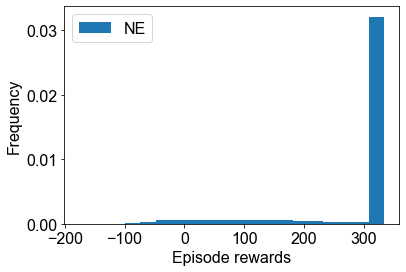

In [12]:
plt.figure()
plt.hist(rewards, bins=20, density=True, label="NE")
plt.xlabel("Episode rewards")
plt.ylabel("Frequency")
plt.legend()
if SAVE_FIG: plt.savefig('figures/episode_rewards_dist.png', dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()


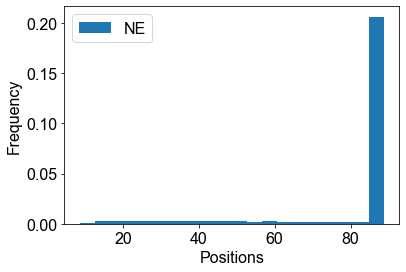

In [13]:
plt.figure()
plt.hist(positions, bins=20, density=True, label="NE")
plt.xlabel("Positions")
plt.ylabel("Frequency")
plt.legend()
if SAVE_FIG: plt.savefig('figures/positions_dist.png', dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()


In [36]:
# reward_threshold = -120
# failure = (rewards < reward_threshold).astype(int)
# position_threshold = 8.5
position_threshold = 9.42
failure = (positions < position_threshold).astype(int)
print(f"Number of failures = {failure.sum()}")

sep = 100
confidence_alpha = 0.05
z_alpha = norm.ppf(1 - confidence_alpha)
rhw_threshold = 0.3
cr = get_crash_rate_batch(failure, sep=sep)
rhw = get_rela_half_width_batch(failure, sep=sep)
num_tests = np.arange(len(failure) // sep) * sep
print(f"Estimated failure rate = {cr[-1]}, relative half-width = {rhw[-1]}")


Number of failures = 88
Estimated failure rate = 8.800000000000044e-06, relative half-width = 0.17534121427665442


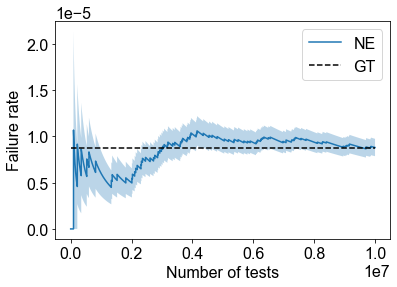

In [37]:
plt.figure()
plt.plot(num_tests, cr, label="NE")
plt.plot([0, num_tests[-1]], [cr[-1], cr[-1]], color="k", linestyle="dashed", label="GT")
plt.fill_between(num_tests, cr-rhw*cr/z_alpha, cr+rhw*cr/z_alpha, alpha=0.3)
# plt.ylim([-0.00001, 0.0004])
plt.xlabel("Number of tests")
plt.ylabel("Failure rate")
plt.legend()
if SAVE_FIG: plt.savefig('figures/failure_rate_ne.png', dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()


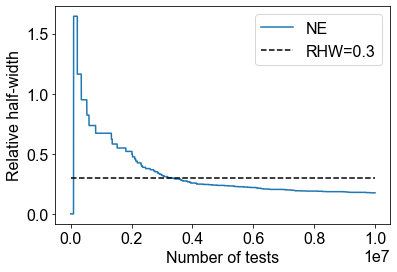

In [38]:
plt.figure()
plt.plot(num_tests, rhw, label="NE")
plt.plot([0, num_tests[-1]], [rhw_threshold, rhw_threshold], color="k", linestyle="dashed", label="RHW=0.3")
plt.xlabel("Number of tests")
plt.ylabel("Relative half-width")
plt.legend()
if SAVE_FIG: plt.savefig('figures/rela_half_width_ne.png', dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()
